In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets
from sklearn import metrics

In [2]:
# Loading the data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [3]:
# Defining the k-means
kmeans_küme = KMeans(n_clusters=4, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

51.8 ms ± 7.91 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


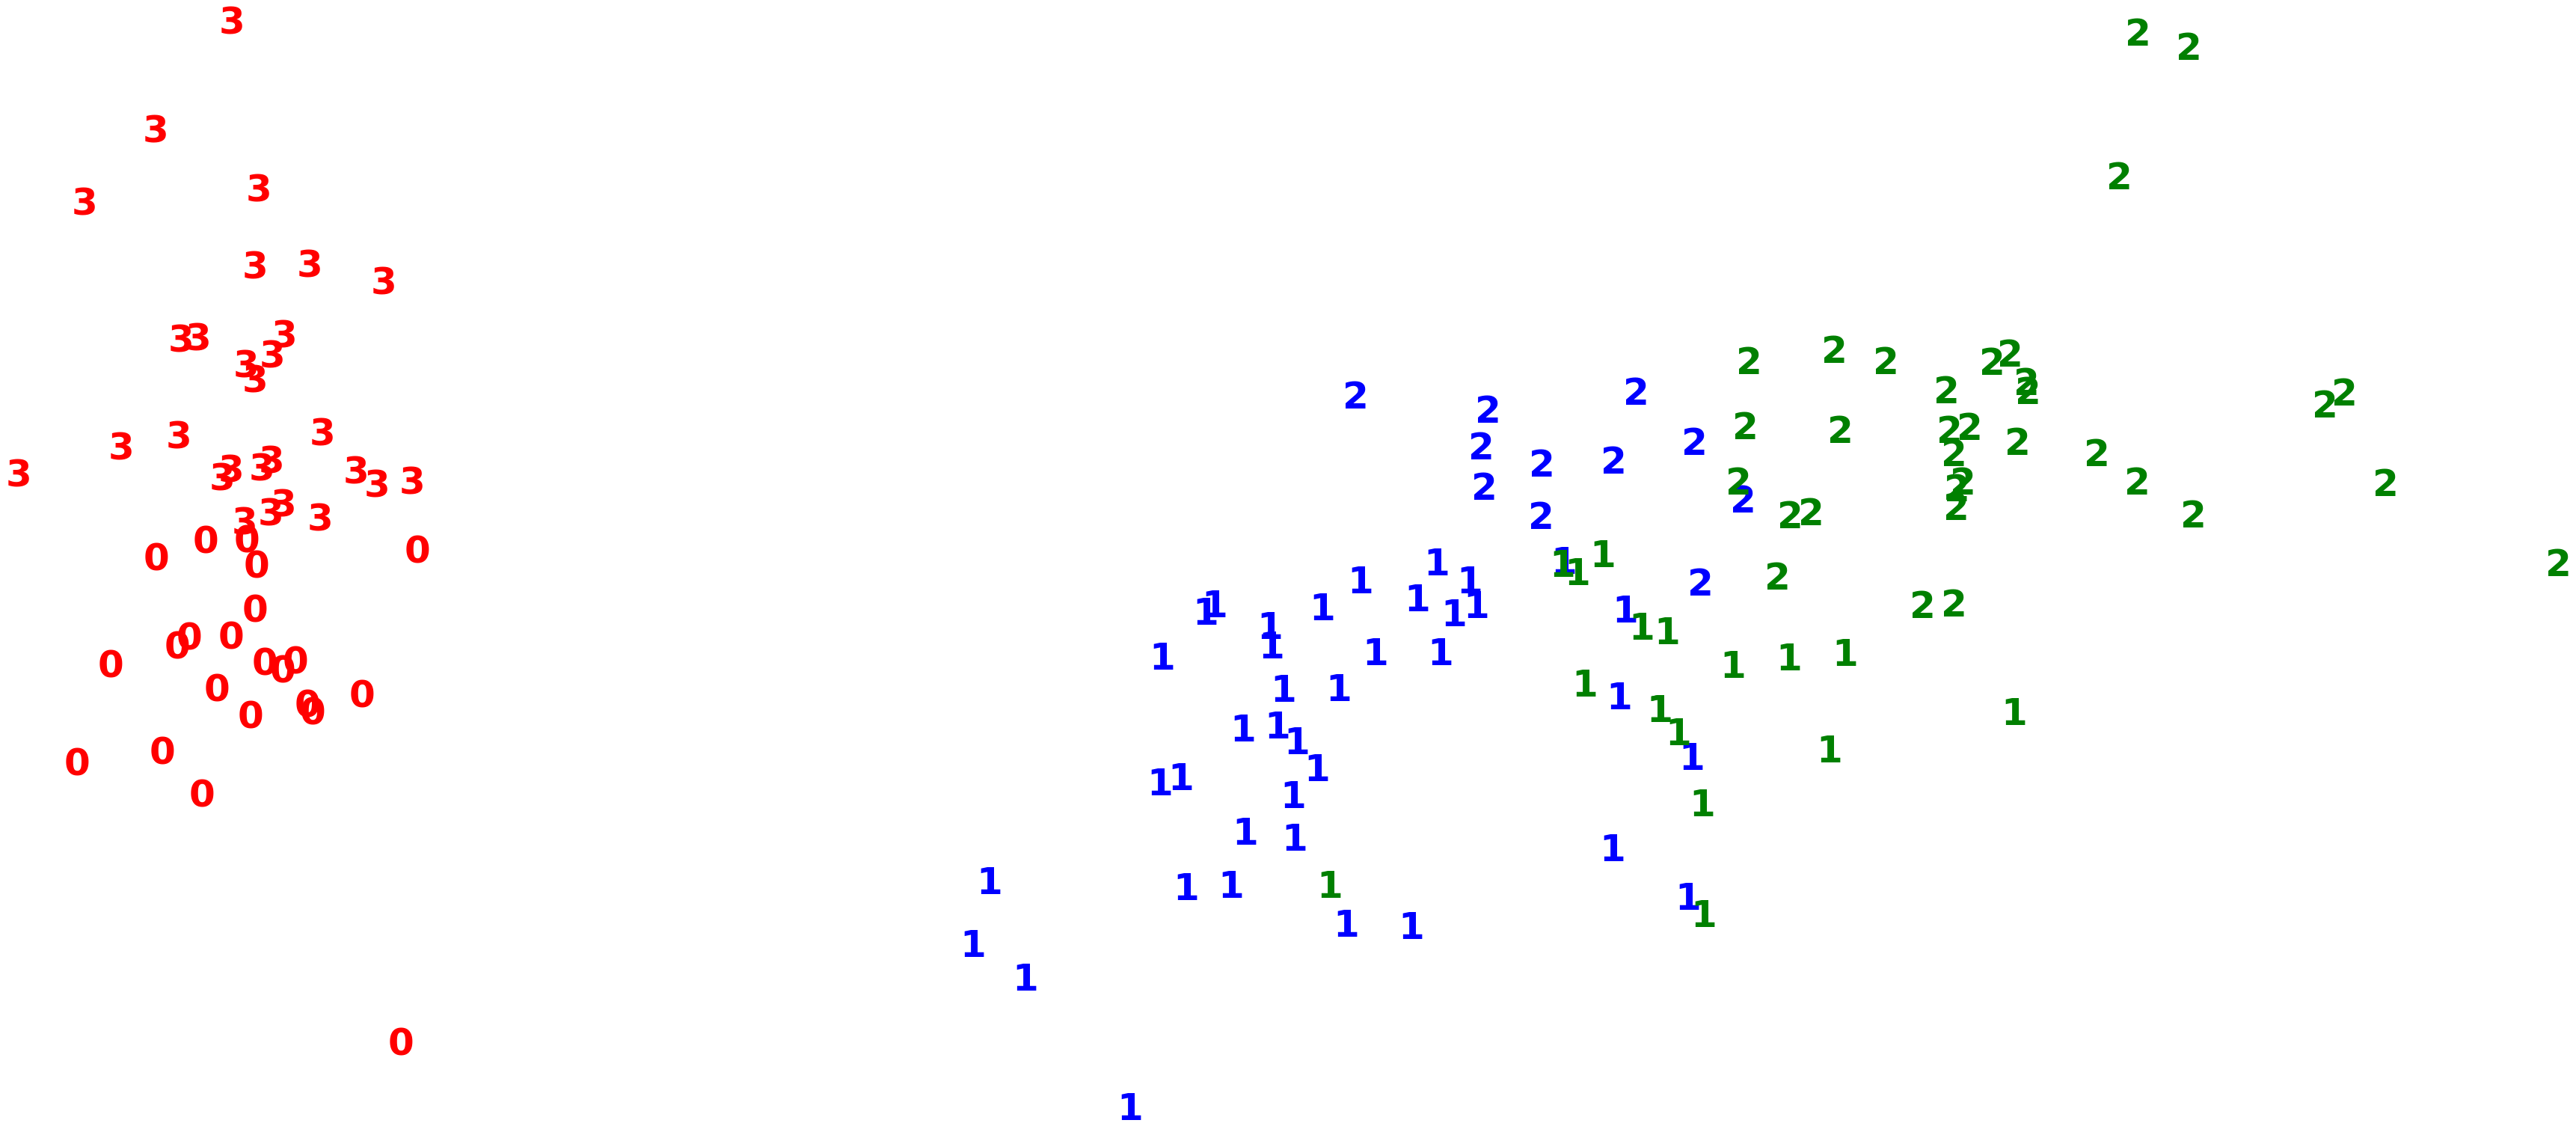

In [4]:
#Aşağıdaki çizimde, sayılar her gözlem için algoritma tarafından atanan kümeyi göstermektedir.
#Renkler gerçek sınıfları gösterir.
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [5]:
#soru2
#Hastaları "kalp hastalığı tanısı" veya "kalp hastalığı tanısı yok" kümelerine doğru şekilde atayan
#bir k-ortalama çözümü oluşturun. Bu durumda, aslında iki olan verideki doğru küme sayısını biliyoruz.
#Ancak burada, k-ortalamanın beklediğimiz şekilde gözlemleri atayıp atamadığını test edeceksiniz.
#K-ortalama, denetimsiz bir öğrenme algoritması olduğu için, hastaların kalp hastalığı olup olmadığına karşı kör olacaktır.

In [6]:
heartdisease_df=pd.read_csv("heart.csv")

In [7]:
heartdisease_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

In [9]:
# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

In [10]:
# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [11]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [12]:
# Defining the k-means
kmeans_küme = KMeans(n_clusters=2, random_state=66)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)


42.6 ms ± 916 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


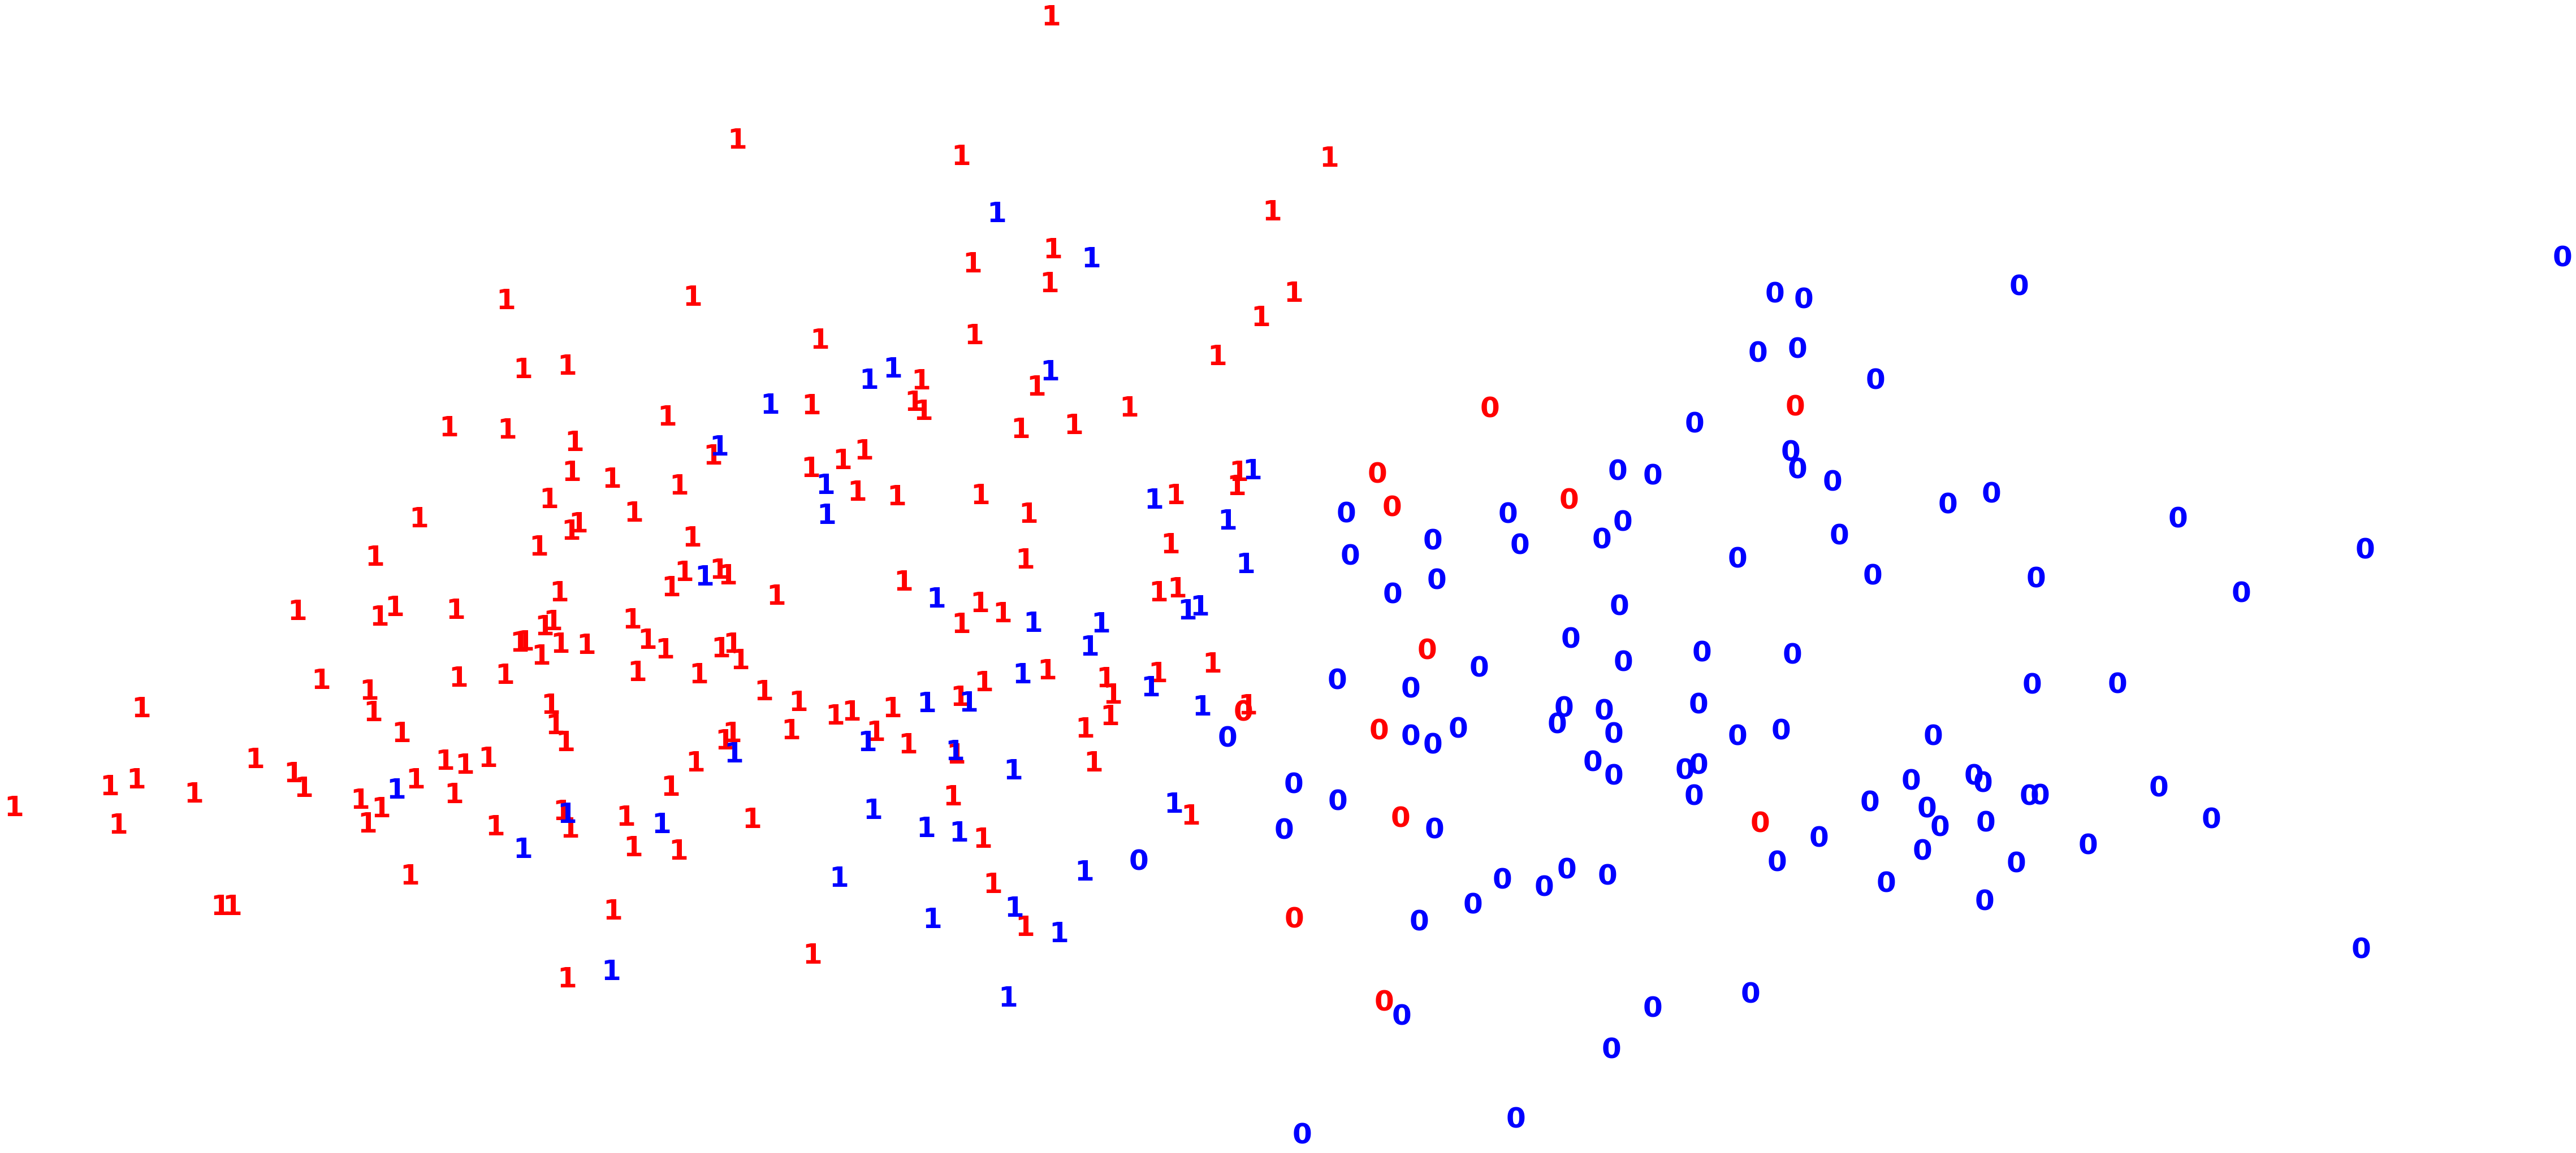

In [13]:
#Aşağıdaki çizimde, sayılar her gözlem için algoritma tarafından atanan kümeyi göstermektedir.
#Renkler gerçek sınıfları gösterir.
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()